# Heart Failure

In [1]:
import zipfile
import pandas as pd
import ehrapy.api as ep
from anndata import AnnData

Installed version 0.2.0 of ehrapy is newer than the latest release 0.1.0! You are running a 
nightly version and features may break!

/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/medcat/cat.py:16: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [3]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv

File ‘heart_failure_clinical_records_dataset.csv’ already there; not retrieving.



# Data Wrangling

Since the dataset does not have a patient ID we add one.

In [4]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv",
                   sep=",")

In [5]:
data["patient_id"] = range(1, len(data) + 1)

In [6]:
data.set_index("patient_id", inplace=True)

In [7]:
data.to_csv("heart_failure_ehrapy_prepared.csv")

## ehrapy sanity check

In [8]:
adata = ep.io.read("heart_failure_ehrapy_prepared.csv",
                   extension="csv",
                   index_column="patient_id")

In [9]:
adata.var_names

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Quality control metrics missing. Calculating...

Output()

/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


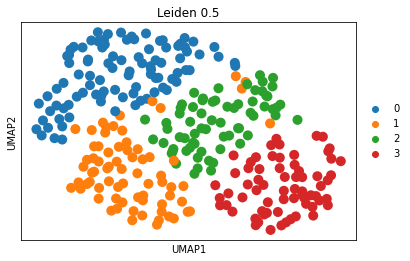

In [10]:
ep.pp.knn_impute(adata)
ep.pp.norm_scale(adata)
ep.pp.pca(adata)
ep.pp.neighbors(adata)
ep.tl.umap(adata)
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(adata, color=["leiden_0_5"], title="Leiden 0.5")

In [11]:
adata.var_names

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

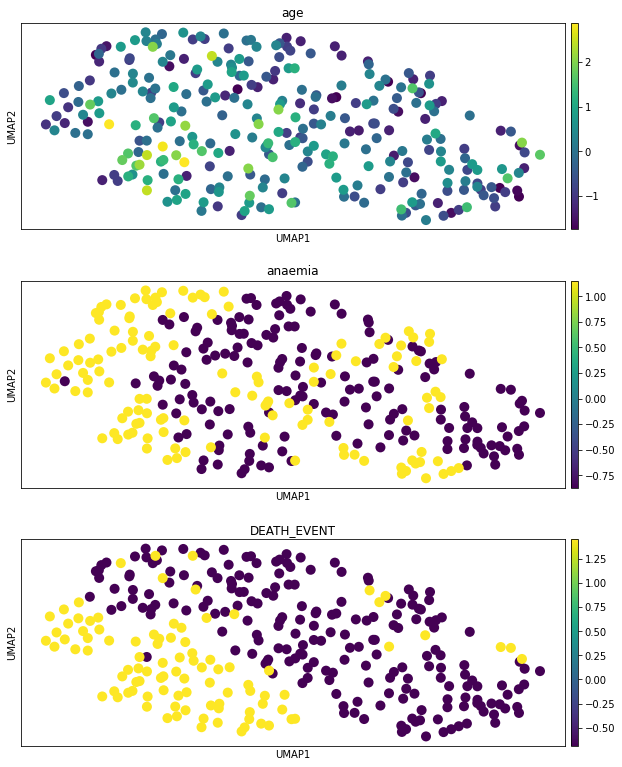

In [12]:
ep.pl.umap(adata, color=["age", "anaemia", "DEATH_EVENT",], ncols=1, wspace=0.75)